In [1]:
#necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import datetime

In [78]:
# load data
data = pd.read_csv("output.csv")
data.head()

,Unnamed: 0,Name of Earth Meteorite,ID of Earth Meteorite,nametype,recclass,Mass of Earth Meteorite,Year at which Earth Meteorite was hit,reclat,recclong,point coordinates
0,0,Aachen,1,Valid,L5,21.0,1880-01-01,50.77500,6.08333,"[6, 50]"
1,1,Aarhus,2,Valid,H6,720.0,1951-01-01,56.18333,10.23333,"[10, 56]"
2,2,Abee,6,Valid,EH4,107000.0,1952-01-01,54.21667,-113.00000,"[-113, 54]"
3,3,Acapulco,10,Valid,Acapulcoite,1914.0,1976-01-01,16.88333,-99.90000,"[-99, 16]"
4,4,Achiras,370,Valid,L6,780.0,1902-01-01,-33.16667,-64.95000,"[-64, -33]"


# Get all the Earth meteorites that fell before the year 2000

In [79]:
# fill missing values
data['Year at which Earth Meteorite was hit']=data['Year at which Earth Meteorite was hit'].fillna("0-0-0")

In [80]:
meteorite_fell_before_2000 = []
for i in range(len(data['Year at which Earth Meteorite was hit'])):
    #print(data['Year at which Earth Meteorite was hit'].str.split("-")[i][0])
    if int(data['Year at which Earth Meteorite was hit'].str.split("-")[i][0]) < 2000:
        meteorite_fell_before_2000.append(data.iloc[i])


In [81]:
len(meteorite_fell_before_2000)

930

In [82]:
meteorite_fell_before_2000=pd.DataFrame(meteorite_fell_before_2000)

In [83]:
meteorite_fell_before_2000

,Unnamed: 0,Name of Earth Meteorite,ID of Earth Meteorite,nametype,recclass,Mass of Earth Meteorite,Year at which Earth Meteorite was hit,reclat,recclong,point coordinates
0,0,Aachen,1,Valid,L5,21.0,1880-01-01,50.77500,6.08333,"[6, 50]"
1,1,Aarhus,2,Valid,H6,720.0,1951-01-01,56.18333,10.23333,"[10, 56]"
2,2,Abee,6,Valid,EH4,107000.0,1952-01-01,54.21667,-113.00000,"[-113, 54]"
3,3,Acapulco,10,Valid,Acapulcoite,1914.0,1976-01-01,16.88333,-99.90000,"[-99, 16]"
4,4,Achiras,370,Valid,L6,780.0,1902-01-01,-33.16667,-64.95000,"[-64, -33]"
...,...,...,...,...,...,...,...,...,...,...
994,994,Timochin,24004,Valid,H5,65500.0,1807-01-01,54.50000,35.20000,"[35, 54]"
995,995,Tirupati,24009,Valid,H6,230.0,1934-01-01,13.63333,79.41667,"[79, 13]"
997,997,Tjabe,24011,Valid,H6,20000.0,1869-01-01,-7.08333,111.53333,"[111, -7]"
998,998,Tjerebon,24012,Valid,L5,16500.0,1922-01-01,-6.66667,106.58333,"[106, -6]"


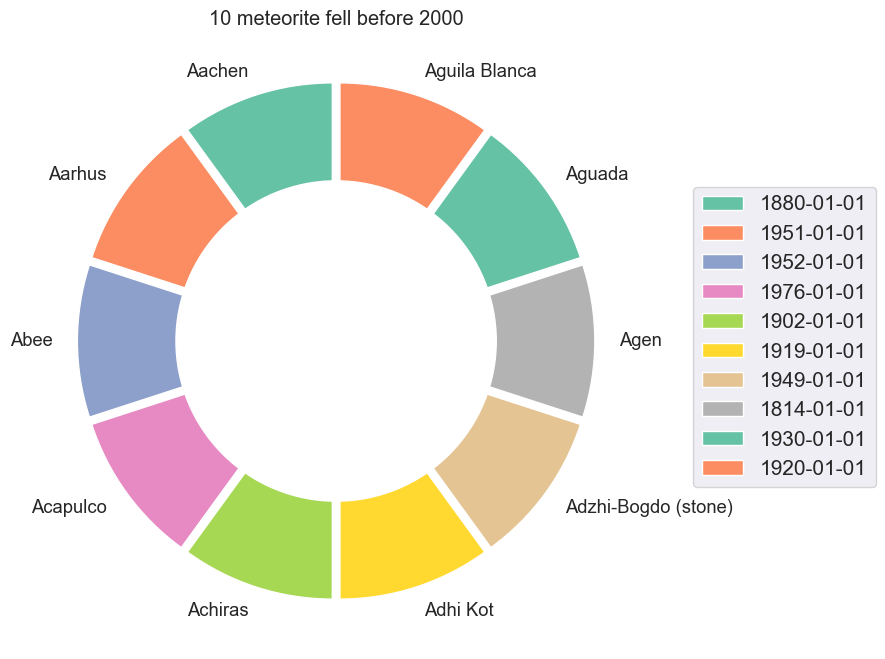

In [84]:
sns.set(font_scale = 1.2)
plt.figure(figsize=(8,8))

explode = [0.05 for i in range(len(meteorite_fell_before_2000['Name of Earth Meteorite'][0:10]))]
plt.pie(
    x=meteorite_fell_before_2000['Name of Earth Meteorite'][0:10].value_counts(), labels=meteorite_fell_before_2000['Name of Earth Meteorite'][0:10].values,
    colors=sns.color_palette('Set2'),
    startangle=90,
    pctdistance=0.80,
    explode=explode
)
plt.legend(meteorite_fell_before_2000["Year at which Earth Meteorite was hit"][0:10].values, bbox_to_anchor=(1.2,0.5), loc="center right", fontsize=15, 
           bbox_transform=plt.gcf().transFigure)

plt.title("10 meteorite fell before 2000")

hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)

plt.show()

# Get all the earth meteorites co-ordinates who fell before the year 1970

In [85]:
meteorite_fell_before_1970 = []
for i in range(len(data['Year at which Earth Meteorite was hit'])):
    #print(data['Year at which Earth Meteorite was hit'].str.split("-")[i][0])
    if int(data['Year at which Earth Meteorite was hit'].str.split("-")[i][0]) < 1970:
        meteorite_fell_before_1970.append(data.iloc[i])

In [86]:
len(meteorite_fell_before_1970)

781

In [87]:
meteorite_fell_before_1970=pd.DataFrame(meteorite_fell_before_1970)
meteorite_fell_before_1970

,Unnamed: 0,Name of Earth Meteorite,ID of Earth Meteorite,nametype,recclass,Mass of Earth Meteorite,Year at which Earth Meteorite was hit,reclat,recclong,point coordinates
0,0,Aachen,1,Valid,L5,21.0,1880-01-01,50.77500,6.08333,"[6, 50]"
1,1,Aarhus,2,Valid,H6,720.0,1951-01-01,56.18333,10.23333,"[10, 56]"
2,2,Abee,6,Valid,EH4,107000.0,1952-01-01,54.21667,-113.00000,"[-113, 54]"
4,4,Achiras,370,Valid,L6,780.0,1902-01-01,-33.16667,-64.95000,"[-64, -33]"
5,5,Adhi Kot,379,Valid,EH4,4239.0,1919-01-01,32.10000,71.80000,"[71, 32]"
...,...,...,...,...,...,...,...,...,...,...
994,994,Timochin,24004,Valid,H5,65500.0,1807-01-01,54.50000,35.20000,"[35, 54]"
995,995,Tirupati,24009,Valid,H6,230.0,1934-01-01,13.63333,79.41667,"[79, 13]"
997,997,Tjabe,24011,Valid,H6,20000.0,1869-01-01,-7.08333,111.53333,"[111, -7]"
998,998,Tjerebon,24012,Valid,L5,16500.0,1922-01-01,-6.66667,106.58333,"[106, -6]"


In [88]:
meteorite_coordinates_before_1970 = meteorite_fell_before_1970['point coordinates']
meteorite_coordinates_before_1970

0         [6, 50]
1        [10, 56]
2      [-113, 54]
4      [-64, -33]
5        [71, 32]
          ...    
994      [35, 54]
995      [79, 13]
997     [111, -7]
998     [106, -6]
999      [34, 47]
Name: point coordinates, Length: 781, dtype: object

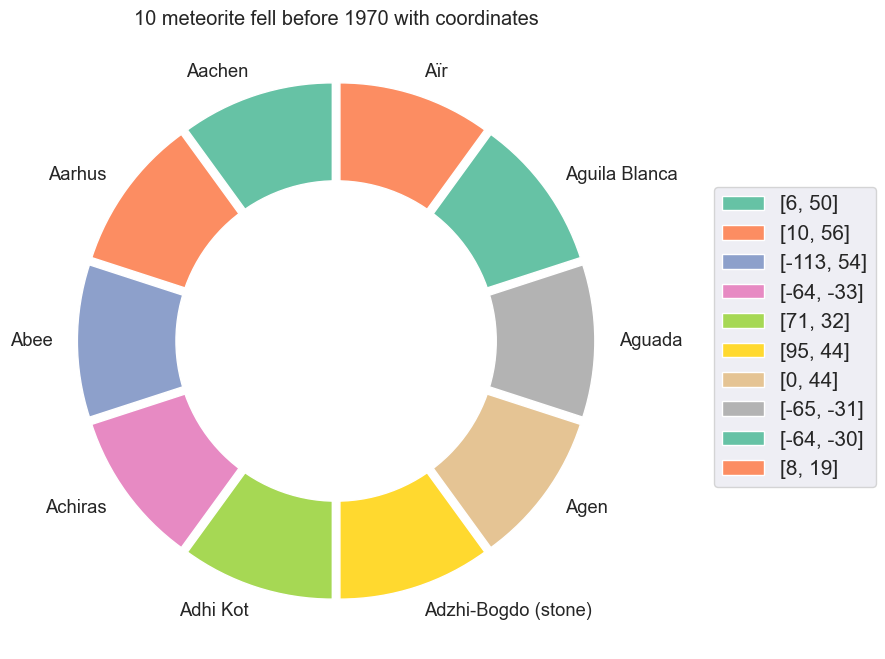

In [94]:
sns.set(font_scale = 1.2)
plt.figure(figsize=(8,8))

explode = [0.05 for i in range(len(meteorite_fell_before_1970['Name of Earth Meteorite'][0:10]))]
plt.pie(
    x=meteorite_fell_before_1970['Name of Earth Meteorite'][0:10].value_counts(), labels=meteorite_fell_before_1970['Name of Earth Meteorite'][0:10][0:10].values,
    colors=sns.color_palette('Set2'),
    startangle=90,
    pctdistance=0.80,
    explode=explode
)
plt.legend(meteorite_fell_before_1970['point coordinates'][0:10].values, bbox_to_anchor=(1.2,0.5), loc="center right", fontsize=15, 
           bbox_transform=plt.gcf().transFigure)

plt.title("10 meteorite fell before 1970 with coordinates")

hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)

plt.show()

# Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more than 10000kg

In [98]:
meteorite_mass_more_than_10000 = []
for i in range(len(data['Mass of Earth Meteorite'])):
    if data['Mass of Earth Meteorite'][i] > 10000:
        meteorite_mass_more_than_10000.append(data.iloc[i])


In [100]:
len(meteorite_mass_more_than_10000)

243

In [101]:
meteorite_mass_more_than_10000 = pd.DataFrame(meteorite_mass_more_than_10000)
meteorite_mass_more_than_10000

,Unnamed: 0,Name of Earth Meteorite,ID of Earth Meteorite,nametype,recclass,Mass of Earth Meteorite,Year at which Earth Meteorite was hit,reclat,recclong,point coordinates
2,2,Abee,6,Valid,EH4,107000.0,1952-01-01,54.21667,-113.00000,"[-113, 54]"
7,7,Agen,392,Valid,H5,30000.0,1814-01-01,44.21667,0.61667,"[0, 44]"
11,11,Aïr,424,Valid,L6,24000.0,1925-01-01,19.08333,8.38333,"[8, 19]"
16,16,Akyumak,433,Valid,"Iron, IVA",50000.0,1981-01-01,39.91667,42.81667,"[42, 39]"
27,27,Alfianello,466,Valid,L6,228000.0,1883-01-01,45.26667,10.15000,"[10, 45]"
...,...,...,...,...,...,...,...,...,...,...
991,991,Tieschitz,23989,Valid,H/L3.6,28000.0,1878-01-01,49.60000,17.11667,"[17, 49]"
992,992,Tilden,23998,Valid,L6,74800.0,1927-01-01,38.20000,-89.68333,"[-89, 38]"
994,994,Timochin,24004,Valid,H5,65500.0,1807-01-01,54.50000,35.20000,"[35, 54]"
997,997,Tjabe,24011,Valid,H6,20000.0,1869-01-01,-7.08333,111.53333,"[111, -7]"


In [121]:
meteorite_mass_more_than_10000['Mass of Earth Meteorite'].values[0:20]

array([ 107000.,   30000.,   24000.,   50000.,  228000.,   32000.,
       2000000.,   17900.,   15000.,   50000.,   50000.,   18000.,
         10322.,   16700.,   11500.,   15000.,   44000.,   29560.,
         15500.,   21000.])

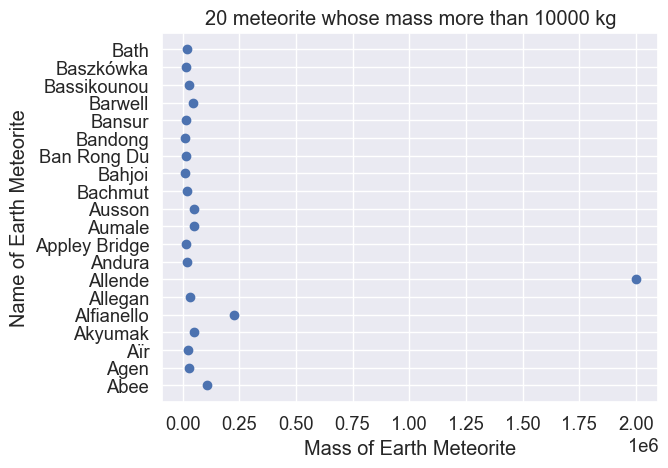

In [124]:
y = meteorite_mass_more_than_10000['Name of Earth Meteorite'].values[0:20]
x = meteorite_mass_more_than_10000['Mass of Earth Meteorite'].values[0:20]
plt.title("20 meteorite whose mass more than 10000 kg")
plt.xlabel("Mass of Earth Meteorite")
plt.ylabel("Name of Earth Meteorite")
plt.scatter(x,y);